# Computer Vision Histograms

### Import statements

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def imshow(img):
    plt.figure(figsize = (10,7))
    plt.imshow(img)

## Histograms

4.png                day4.jpg             noisy.png
blue-flowers.jpg     fry.png              notes.png
blue-red-flowers.png n.png                purple-flowers.jpg
clean-text.jpg       night1.jpg           scan.jpg
day1.jpg             night2.jpg           sketch.png
day2.jpg             night3.png           text.png
day3.jpg             night4.jpg


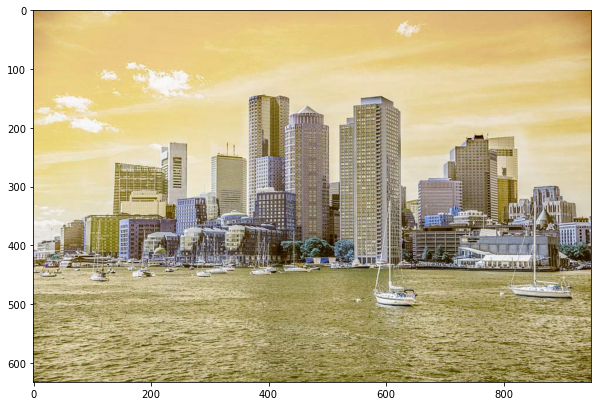

In [15]:
# Load some images, calculate and plot their color histograms, one color at the time
# try it with different color spaces BGR, HSV, etc
!ls img
img = cv2.imread('img/day3.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
imshow(img)

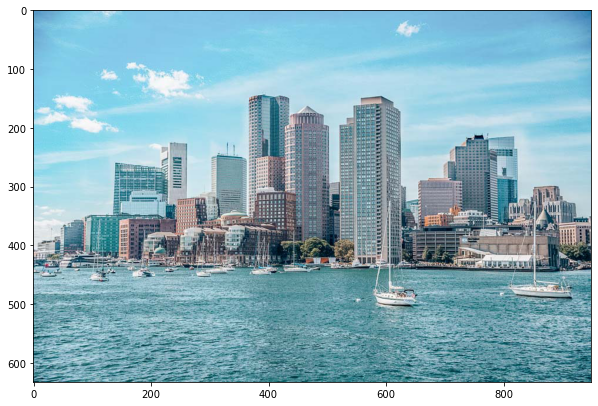

In [16]:
imshow(rgb_img)

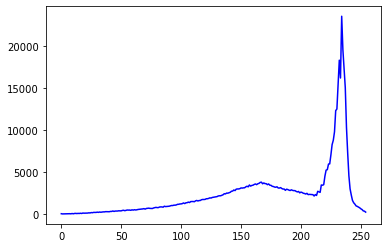

In [20]:
hist_blue = cv2.calcHist([img],[0],None,[255],[0,255])
plt.plot(hist_blue,color='b')

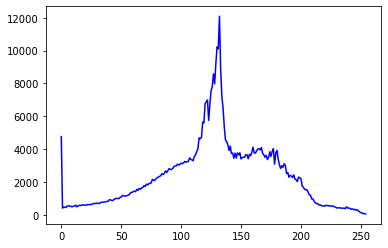

In [21]:
hist_blue = cv2.calcHist([rgb_img],[0],None,[255],[0,255])
plt.plot(hist_blue,color='b')

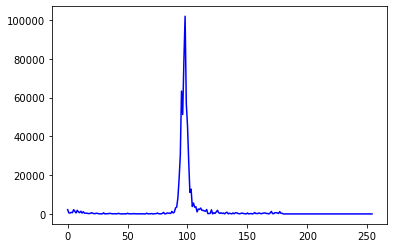

In [22]:
hist_blue = cv2.calcHist([hsv_img],[0],None,[255],[0,255])
plt.plot(hist_blue,color='b')

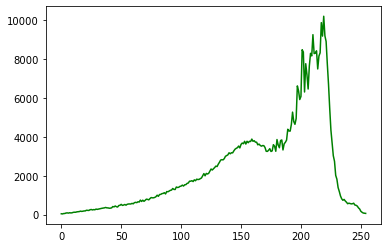

In [11]:
hist_green = cv2.calcHist([img],[1],None,[255],[0,255])
plt.plot(hist_blue,color='g')

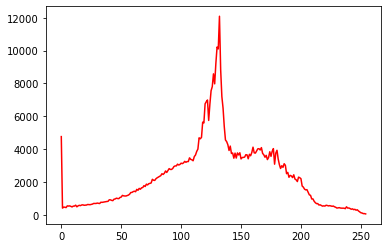

In [12]:
hist_blue = cv2.calcHist([img],[2],None,[255],[0,255])
plt.plot(hist_blue,color='r')

[Hint](# "cv2.calcHist") 


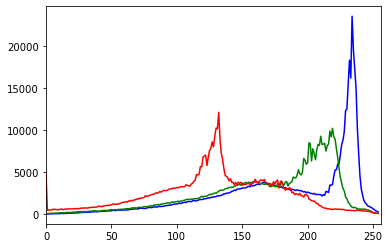

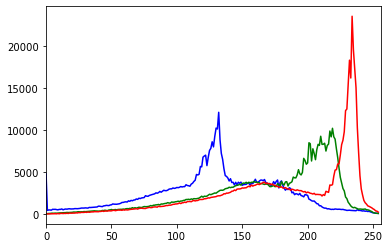

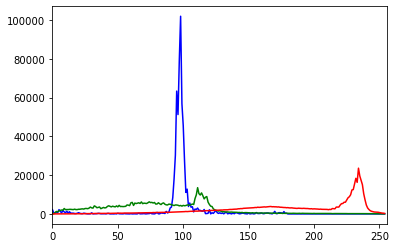

In [23]:
# Now try to plot all 3 channels at the same time, does the histogram give you an idea of what the image looks like?
colors = ['b','g','r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([img],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

for i, color in enumerate(colors):
    histogram = cv2.calcHist([rgb_img],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

for i, color in enumerate(colors):
    histogram = cv2.calcHist([hsv_img],[i],None,[255],[0,255])
    plt.plot(histogram, color =color)
    plt.xlim(0,256)
plt.show()

## Mini project

### Level 1

#### Image classifier

1. By using only computer vision techniques (no Neural Networks and ML are not allowed) create a binary classifier that can detect if a picutre was taken during the day, you can use the images day/night in the img folder or feel free to add your own images.

In [24]:
!ls img

4.png                day4.jpg             noisy.png
blue-flowers.jpg     fry.png              notes.png
blue-red-flowers.png n.png                purple-flowers.jpg
clean-text.jpg       night1.jpg           scan.jpg
day1.jpg             night2.jpg           sketch.png
day2.jpg             night3.png           text.png
day3.jpg             night4.jpg


use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

In [87]:
def resize(img):
    width = 600
    height = 1100
    resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
    return resized

In [88]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

In [95]:
img = cv2.imread('img/night2.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Avg brightness: 78.19671212121212


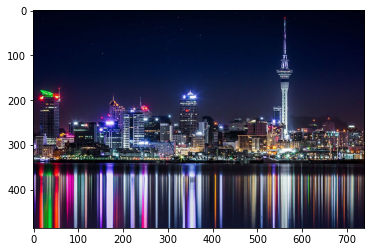

In [96]:
resized_img = resize(img)
avg = avg_brightness(resized_img)
print('Avg brightness: ' + str(avg))
plt.imshow(rgb_img)

#highest night4 avg = 153,45
#lowest day2 avg = 141,44

In [119]:
def day_or_night(path_to_image):
    img = cv2.imread('img/day2.jpg')
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resized_img = resize(img)
    avg = avg_brightness(resized_img)
    if avg < 100:
        return 'Avg brightness: ' , str(round(avg)), 'It is night'
    else:
        return 'Avg brightness: ' , str(round(avg)),'It is day'

In [120]:
day_or_night('img/night2.jpg')

('Avg brightness: ', '133', 'It is day')

### Level 2

#### Image Classifier

1. This should be an easy one, change the classifier so it can also detect night pictures